# Trabalho módulo 1 

#### Autor: Geraldo Silva

github: https://github.com/GeraldoSilva1982/bootcamp-tech-pan/tree/main/modulo1

In [40]:

## Importando libs para trabalhar com dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [41]:
#Lendo arquivo custo_diaria.csv fornecido pelo Professor Leandro Lessa

dataset = "https://raw.githubusercontent.com/GeraldoSilva1982/bootcamp-tech-pan/main/modulo1/custo_diaria.csv"

dados = pd.read_csv(dataset, header=None,skiprows=1, sep = ";")


In [42]:
#Colocando rótolos nos dados

rotolos = ["quantidadePessoas", "valorDiaria"]
dados.columns = rotolos


In [43]:
# Obtendo dados estátisticos dos dados

dados.describe()

,quantidadePessoas,valorDiaria
count,30.000000,30.000000
mean,28.600000,1648.633333
std,18.189804,950.522197
min,1.000000,150.000000
25%,13.500000,869.250000
50%,26.000000,1627.500000
75%,44.500000,2497.000000
max,60.000000,3300.000000


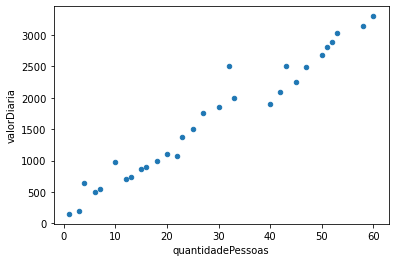

In [44]:
#Plotando gráficos

dados.plot(kind = 'scatter', x = 'quantidadePessoas', y = 'valorDiaria')

plt.show() 

In [45]:
# Calculando a correlaçãoc dos dados

dados.corr()

,quantidadePessoas,valorDiaria
quantidadePessoas,1.000000,0.978666
valorDiaria,0.978666,1.000000


In [46]:

#Calculando Regressão Linear

from sklearn.linear_model import LinearRegression

In [47]:
#instaciando objeto 

reg_lin = LinearRegression()

X = dados[['quantidadePessoas']]
Y = dados['valorDiaria']

reg_lin.fit(X,Y)

LinearRegression()

In [48]:
# Valor do  intercept da previsão
reg_lin.intercept_ 

186.00229281307315

In [49]:
#Valor do coeficiente angular da reta de regressão
reg_lin.coef_

array([51.14094547])

In [50]:
# definido função linear de regressão

def valorCalculado(quant_pessoas = []):
        a = []
        for b in quant_pessoas:
            a.append(186 + b * 51)
        return a
               

In [51]:
# Calculando valores para lista com 17,25 e 27 pessoas.
# função usada para perguntas 10,11 e 12 do teste do modulo1
valor = valorCalculado([17,25,27])


In [52]:
# pelos dados de 25 pessaos o valor é = 1500,00
#logo a diderença entre o valor real e função de regressão  é:
var = valorCalculado([25])
1500 - var.pop()

39

In [53]:
# pelos dados de 27 pessaos o valor é = 1755,00
#logo a diderença entre o valor real e função de regressão  é:
var = valorCalculado([27])
1755 - var.pop()

192

In [65]:
from sklearn.metrics import mean_squared_error

# Será adicionado nova coluna chamada valorCalc no dataframe com valores calculados 
#da função de regressão 
#
valorcalc = valorCalculado(dados['quantidadePessoas'])
dados['valorCalc'] = valorcalc

#mean_squared_error(dados['valorDiaria'], dados['valorCalc'])

In [66]:
#Qual o valor obtido para mean_squared_error?

mean_squared_error(dados['valorDiaria'], dados['valorCalc'])

36890.3

In [67]:
#Qual o valor obtido para mean_absolute_error?

from sklearn.metrics import mean_absolute_error

mean_absolute_error(dados['valorDiaria'], dados['valorCalc'])

139.56666666666666

In [71]:
#Qual foi o score obtido pelo algoritmo de regressão?

from sklearn.metrics import r2_score

r2_score(dados['valorDiaria'], dados['valorCalc'])

0.9577612636035636